In [1]:
import numpy as np

import pandas as pd

import quaternion
from scipy.spatial.transform import Rotation as R

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/data_132574489412995799_.txt', sep=' ')
data = data[3:]

In [3]:
data[1062:]

,Time,Status,StatusInt,ConvergeDistance,LeftDirX,LeftDirY,LeftDirZ,RightDirX,RightDirY,RightDirZ,...,GlobalLeftDirZ,GlobalRightDirX,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigX,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigX,GlobalRightOrigY,GlobalRightOrigZ
1065,2978974,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1066,2978983,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1067,2978991,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1068,2978999,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049164,1.267172,-0.089499,0.010214,1.268289,-0.088628
1069,2979008,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049164,1.267172,-0.089499,0.010214,1.268289,-0.088628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,3512025,14,14,0,-0.162796,-0.138885,0.976822,-0.102356,-0.167694,0.980499,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61301,3512033,14,14,0,-0.163330,-0.138840,0.976746,-0.103821,-0.182877,0.977631,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61302,3512042,14,14,0,-0.167343,-0.139420,0.975983,-0.104904,-0.173172,0.979279,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020
61303,3512050,14,14,0,-0.181946,-0.146698,0.972290,-0.106506,-0.172852,0.979157,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020


In [4]:
#  'Time', - внутреннее время окологрофа в мс делим на 1000 частота = 120Грц 
#  'Status', - значение енама 
#  'StatusInt', - енам числом 
#  'SphereRadius', - не должно было быть 
#  'SphereDistance', - не должно было быть  сдивгаем имена колонок 
#  'ConvergeDistance', - расстояние сведение глаз 
#  'LeftDirX', - направление вгляда y - вверх, тройка леdвая , x - вправо 
#  'LeftDirY', 
#  'LeftDirZ', 
#  'RightDirX',
#  'RightDirY', 
#  'RightDirZ', 
#  'LeftOrigX', - положение точки отсчета взгляда (центр взгляда )
#  'LeftOrigY', 
#  'LeftOrigZ',
#  'RightOrigX', 
#  'RightOrigY', 
#  'RightOrigZ', 
#  'PupilSizeL', - размер зрачка мл 
#  'PupilSizeR',
#  'HeadPosX', - положение головы, координата шлема 
#  'HeadPosY', 
#  'HeadPosZ', 
#  'HeadRotX', - кваратанион поворота 
#  'HeadRotY', 
#  'HeadRotZ',
#  'HeadRotW', 
#  'GlobalLeftDirX', - в глобальной системе координат 
#  'GlobalLeftDirY', 
#  'GlobalLeftDirZ',
#  'GlobalRightDirX', 
#  'GlobalRightDirY', 
#  'GlobalRightDirZ',
#  'GlobalLeftOrigX', 
#  'GlobalLeftOrigY', 
#  'GlobalLeftOrigZ',
#  'GlobalRightOrigX', 
#  'GlobalRightOrigY', 
#  'GlobalRightOrigZ'],

In [5]:
#def coor_as_angle(Z, X, Y):
#    hyp = np.sqrt(Z**2 + X**2 + Y**2)
#
#    alpha = Z / hyp
#    angle = np.arccos(alpha) 
#    return angle

def coor_as_angle(Z, X, Y):
    sin_alpha = np.sqrt(1 - Z**2)
    angle = np.arcsin(sin_alpha)
    
    return angle 

In [6]:
left_angle = coor_as_angle(data.LeftDirZ, data.LeftDirX, data.LeftDirY)
right_angle = coor_as_angle(data.RightDirZ, data.RightDirX, data.RightDirY)

left_angle, right_angle

(3        0.158259
 4        0.157969
 5        0.158163
 6        0.157678
 7        0.157872
            ...   
 61300    0.215723
 61301    0.216079
 61302    0.219609
 61303    0.235962
 61304    0.213862
 Name: LeftDirZ, Length: 61302, dtype: float64,
 3        0.181881
 4        0.181881
 5        0.182133
 6        0.182133
 7        0.180186
            ...   
 61300    0.197810
 61301    0.211912
 61302    0.203928
 61303    0.204530
 61304    0.205131
 Name: RightDirZ, Length: 61302, dtype: float64)

In [7]:
print('Statistics \n left: mean={0}, std={1};\n right: mean={2}, std={3}'.format(
                                                                            np.mean(left_angle), np.std(left_angle),
                                                                            np.mean(right_angle), np.std(right_angle) 
                                                                                ))

Statistics 
 left: mean=0.21873374831075768, std=0.17106677549514213;
 right: mean=0.2283412459816426, std=0.17823481323027282


In [8]:
# data.HeadRotW.T, data.HeadRotX.T, data.HeadRotY.T, data.HeadRotZ.T
rots = data[['HeadRotW', 'HeadRotX', 'HeadRotY', 'HeadRotZ']]
r = R.from_quat(rots.to_numpy().reshape(-1, 4))
rot_as_angle = r.as_euler('zyx', degrees=False)

rot_as_angle

array([[-0.0481864 ,  0.00887805, -3.12560704],
       [-0.0481864 ,  0.00887805, -3.12560704],
       [-0.0481864 ,  0.00887805, -3.12560704],
       ...,
       [-0.41961758, -0.05582958, -2.94616225],
       [-0.41961758, -0.05582958, -2.94616225],
       [-0.41961758, -0.05582958, -2.94616225]])

In [9]:
rot_angle =  pd.Series(rot_as_angle.T[0])

In [10]:
test_data = data[['HeadPosY', 'HeadPosZ',
                  'LeftDirY', 'LeftDirZ',
                  'RightDirY', 'RightDirZ',
                  'GlobalLeftDirY', 'GlobalLeftDirZ', 
                  'GlobalRightDirY', 'GlobalRightDirZ',
                  'GlobalLeftOrigY', 'GlobalLeftOrigZ',
                  'GlobalRightOrigY', 'GlobalRightOrigZ']].copy()

test_data['left_angle'] = left_angle.copy()
test_data['right_angle'] = right_angle.copy()
test_data['rot_angle'] = rot_angle.copy()

In [11]:
test_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigY,GlobalRightOrigZ,left_angle,right_angle,rot_angle
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.158259,0.181881,-0.048186
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.157969,0.181881,-0.048186
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.158163,0.182133,-0.048186
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157678,0.182133,-0.048186
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157872,0.180186,-0.048186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.215723,0.197810,-0.419618
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.216079,0.211912,-0.419618
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.219609,0.203928,NaN
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.235962,0.204530,NaN


In [12]:
corr = test_data.corr()

<AxesSubplot:>

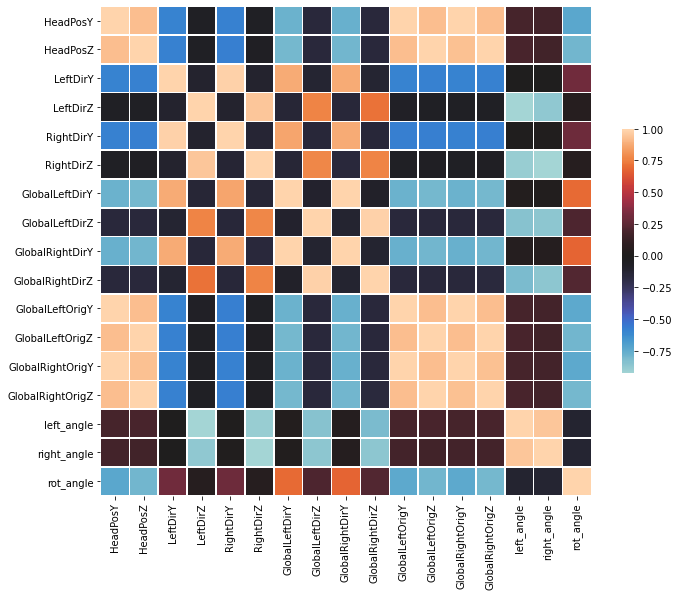

In [13]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, vmax=1, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
plot_data = test_data.copy()
plot_data['Time'] = data.Time

plot_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigY,GlobalRightOrigZ,left_angle,right_angle,rot_angle,Time
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.158259,0.181881,-0.048186,2969601
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,0.157969,0.181881,-0.048186,2969610
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.158163,0.182133,-0.048186,2969618
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157678,0.182133,-0.048186,2969626
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,0.157872,0.180186,-0.048186,2969643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.215723,0.197810,-0.419618,3512025
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,0.216079,0.211912,-0.419618,3512033
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.219609,0.203928,NaN,3512042
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,0.235962,0.204530,NaN,3512050


In [15]:
def plot_table(value, a, b):
    fig, axs = plt.subplots(2, 2, figsize=(18, 11))
    fig.suptitle('Vertically stacked subplots')

    axs[0, 0].plot(plot_data.Time[a:b], plot_data[value][a:b])
    axs[0, 1].plot(plot_data.Time[a:b], plot_data['rot_angle'][a:b])
    axs[1, 0].plot(plot_data.Time[a:b], plot_data['left_angle'][a:b])
    axs[1, 1].plot(plot_data.Time[a:b], plot_data['right_angle'][a:b])

    axs[0, 0].set_title(value) 
    axs[0, 1].set_title('rot_angle')
    axs[1, 0].set_title('left_angle')
    axs[1, 1].set_title('right_angle')


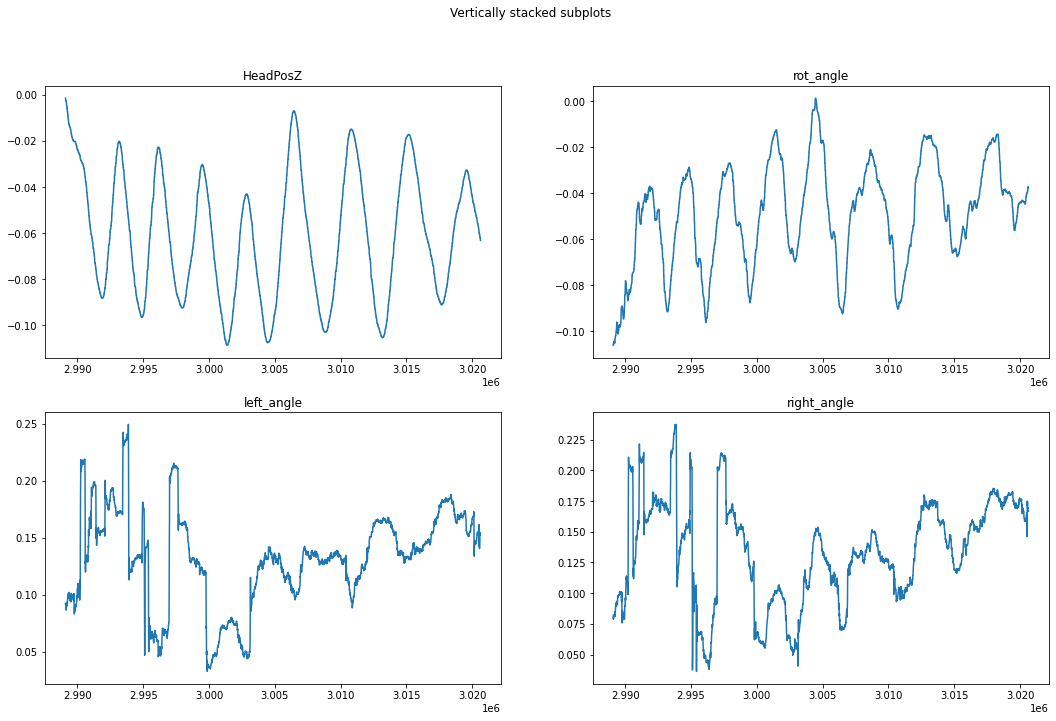

In [16]:
plot_table('HeadPosZ', 2200, 5800)

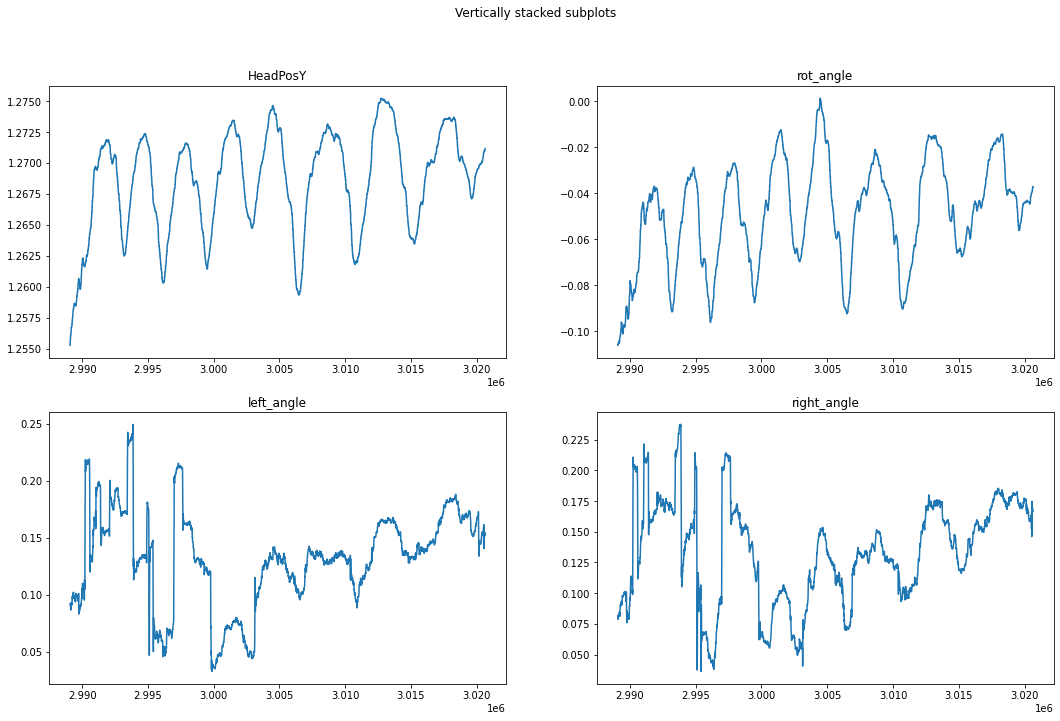

In [17]:
plot_table('HeadPosY', 2200, 5800)